# 01. Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
Predict the coordinates of a bounding box of an item in an image.
Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).
In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

# Architecture of a regression model
Input shapes and output shapes
X: features/data (inputs)
y: labels (outputs)
Creating custom data to view and fit
Steps in modelling
Creating a model
Compiling a model
Defining a loss function
Setting up an optimizer
Creating evaluation metrics
Fitting a model (getting it to find patterns in our data)
Evaluating a model
Visualizng the model ("visualize, visualize, visualize")
Looking at training curves
Compare predictions to ground truth (using our evaluation metrics)
Saving a model (so we can use it later)
Loading a model
Don't worry if none of these make sense now, we're going to go through each.

# How you can use this notebook
You can read through the descriptions and the code (it should all run), but there's a better option.

# Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.

Typical architecture of a regresison neural network
The word typical is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

Hyperparameter	Typical value
Input layer shape	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)
Hidden layer(s)	Problem specific, minimum = 1, maximum = unlimited
Neurons per hidden layer	Problem specific, generally 10 to 100
Output layer shape	Same shape as desired prediction shape (e.g. 1 for house price)
Hidden activation	Usually ReLU (rectified linear unit)
Output activation	None, ReLU, logistic/tanh
Loss function	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers
Optimizer	SGD (stochastic gradient descent), Adam
Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias tf (short for TensorFlow).

In [12]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.20.0
Notebook last run (end-to-end): 2025-08-27 13:07:21.374343


# Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.



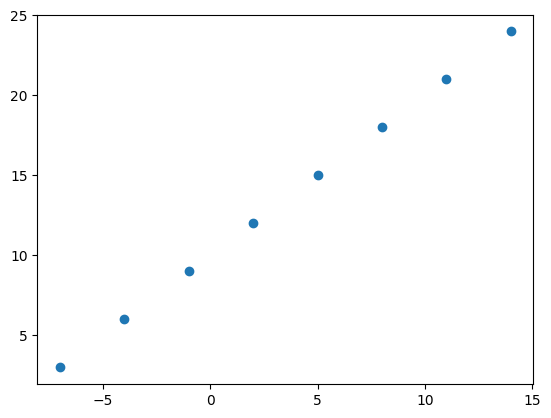

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);
     


Before we do any modelling, can you calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0?

Or how about if X was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

# Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [14]:

# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([234368])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([234368], dtype=int32)>)

In [15]:

house_info.shape

TensorShape([3])

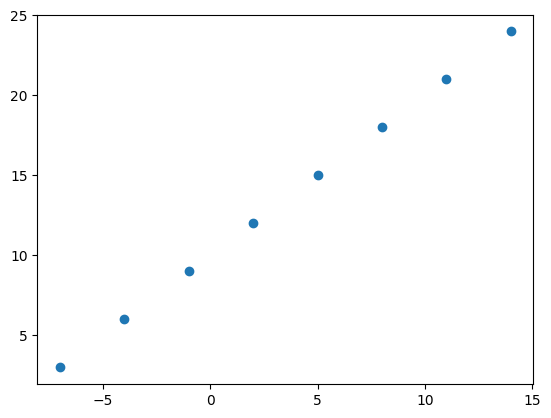

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [17]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [18]:

# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

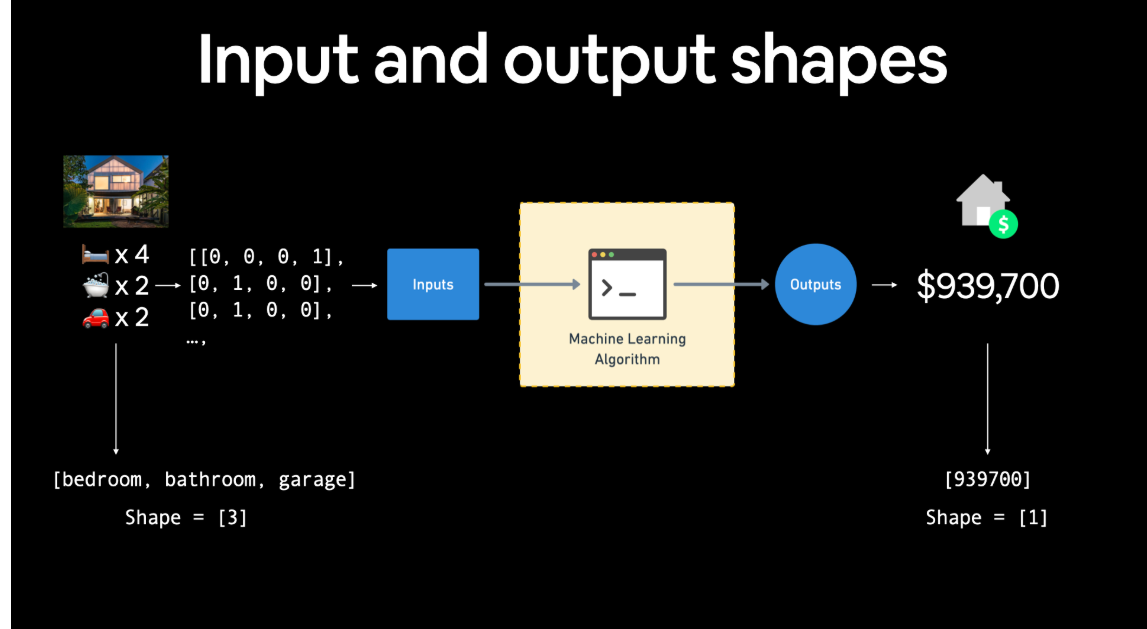
If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

example of input and output shapes for a housing price prediction problem If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.

# Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [19]:

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step - loss: 12.6147 - mae: 12.6147
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 12.4822 - mae: 12.4822
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 12.3497 - mae: 12.3497
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 12.2172 - mae: 12.2172
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 12.0847 - mae: 12.0847


Boom!

We've just trained a model to figure out the patterns between X and y.

How do you think it went?

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
#What do you think the outcome should be if we passed our model an X value of 17.0?
model.predict([17.0])

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

It doesn't go very well... it should've output something close to 27.0.

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

# Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

## Creating a model 
here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
## Compiling a model 
you might want to choose optimization function or perhaps change the learning rate of the optimization function.
## Fitting a model 
perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

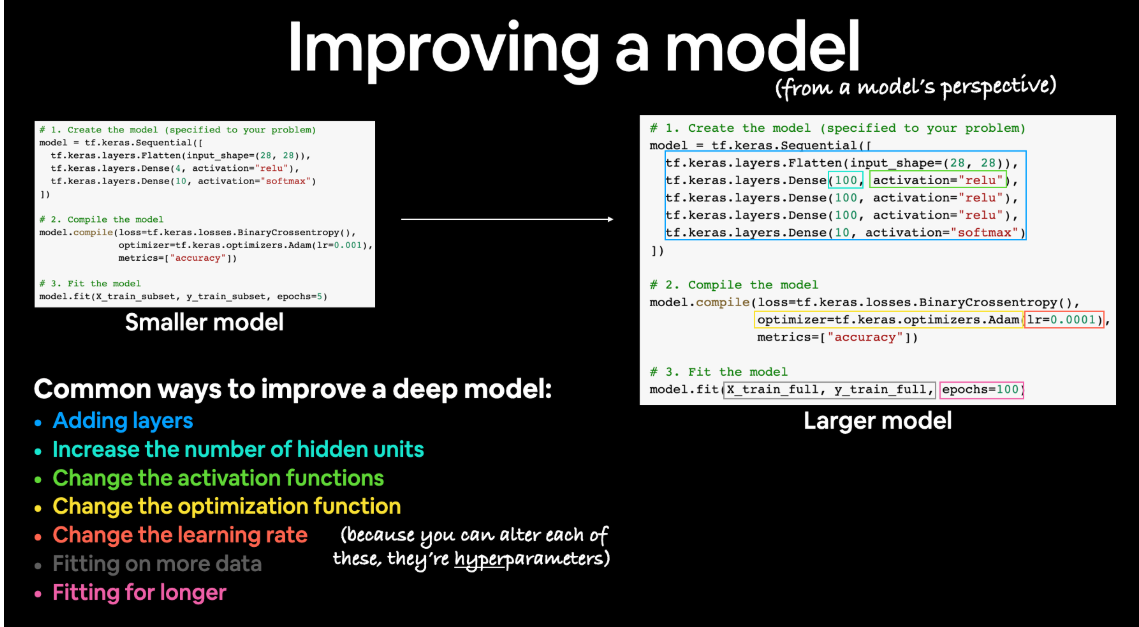

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).



In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


In [ ]:

# Remind ourselves of what X and y are
X, y

In [22]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[7.3249726]], dtype=float32)

# Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

# Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?
Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [23]:

# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [24]:

# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y
     

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [25]:

# Same result as above
y = X + 10
y



array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.




In [26]:
len(X)


50

In [27]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

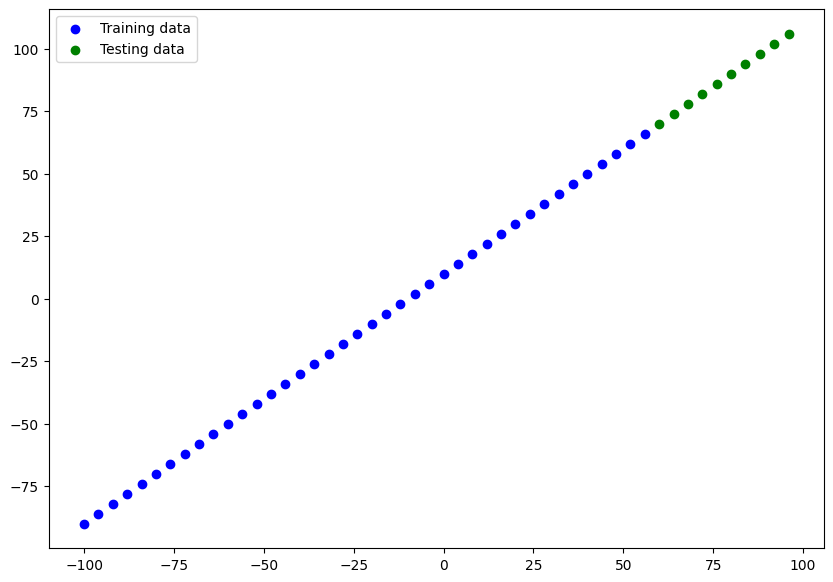

In [28]:

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

# Visualizing the model
After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [30]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [31]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:

# This will work after specifying the input shape
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.
Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [33]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output
     

In [34]:

# Check the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [36]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# Visualizing the predictions
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [38]:
prediction = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [39]:
prediction

array([[55.582226],
       [59.196   ],
       [62.809772],
       [66.423546],
       [70.03732 ],
       [73.65109 ],
       [77.26486 ],
       [80.87864 ],
       [84.49242 ],
       [88.106186]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

🔑 Note: If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [51]:


def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=prediction):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

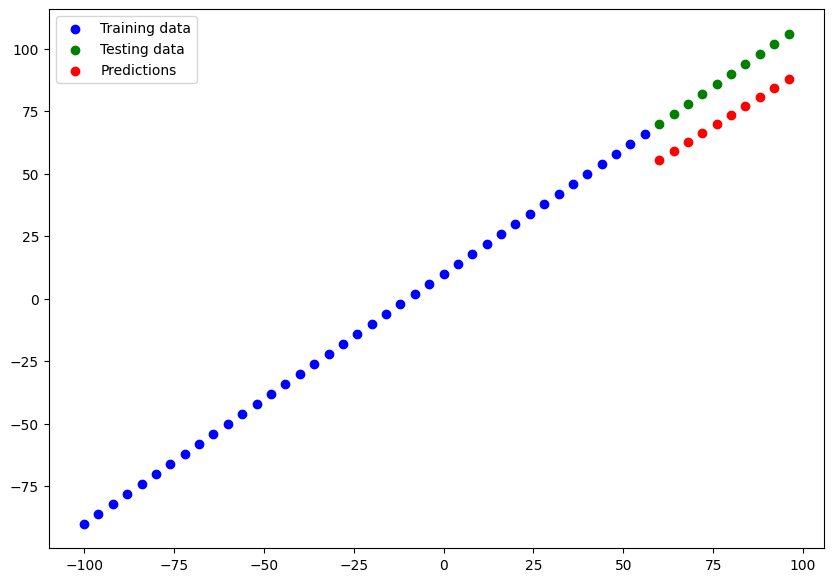

In [53]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=prediction)

# Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

**Mean absolute error (MAE)** - the mean difference between each of the predictions.
**Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [42]:

# Evaluate the model on the test set
model.evaluate(X_test, y_test)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 16.1558 - mae: 16.1558


[16.155794143676758, 16.155794143676758]

In [43]:
from keras.metrics import mean_absolute_error
import tensorflow as tf

mae = mean_absolute_error(y_test, prediction)   # array of errors
mae_value = tf.reduce_mean(mae).numpy()        # take mean
print("MAE:", mae_value)


MAE: 16.155794


In [44]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [45]:
prediction

array([[55.582226],
       [59.196   ],
       [62.809772],
       [66.423546],
       [70.03732 ],
       [73.65109 ],
       [77.26486 ],
       [80.87864 ],
       [84.49242 ],
       [88.106186]], dtype=float32)

In [46]:
y_test.shape, prediction.shape

((10,), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [47]:

# Shape after squeeze
prediction.squeeze().shape

(10,)

In [48]:


# What do they look like?
y_test, prediction.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([55.582226, 59.196   , 62.809772, 66.423546, 70.03732 , 73.65109 ,
        77.26486 , 80.87864 , 84.49242 , 88.106186], dtype=float32))

# Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

- **model_1**- same as original model, 1 layer, trained for 100 epochs.
- **model_2** - 2 layers, trained for 100 epochs.
- **model_3**- 2 layers, trained for 500 epochs.
# Build model_1

In [50]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 104.1979 - mae: 104.1979 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 69.4224 - mae: 69.4224
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 34.8161 - mae: 34.8161
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.9212 - mae: 8.9212
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.8098 - mae: 8.8098
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.5512 - mae: 8.5512 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.2930 - mae: 9.2930
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.3990 - mae: 8.3990
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0711 - mae: 9.0711
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.9064 - mae: 7.9064
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.8475 - mae: 10.8475
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.6581 - mae: 7.6581 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


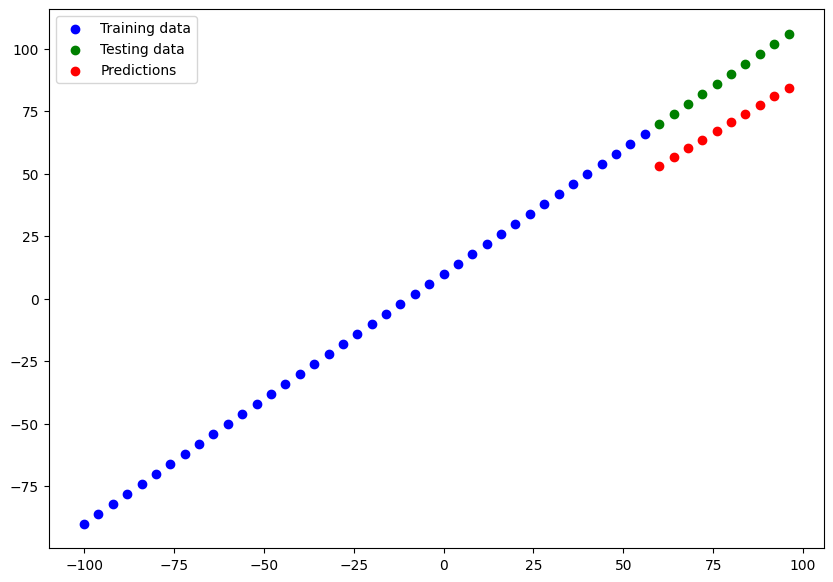

In [54]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_1 = mean_absolute_error(y_test, y_preds_1)
mse_1 = mean_squared_error(y_test, y_preds_1)

print(mae_1, mse_1)


19.17702293395996 370.1734313964844


In [61]:
import numpy as np
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, prediction)
print("MAE:", mae)


MAE: 16.155794143676758


**Build model_2**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [64]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


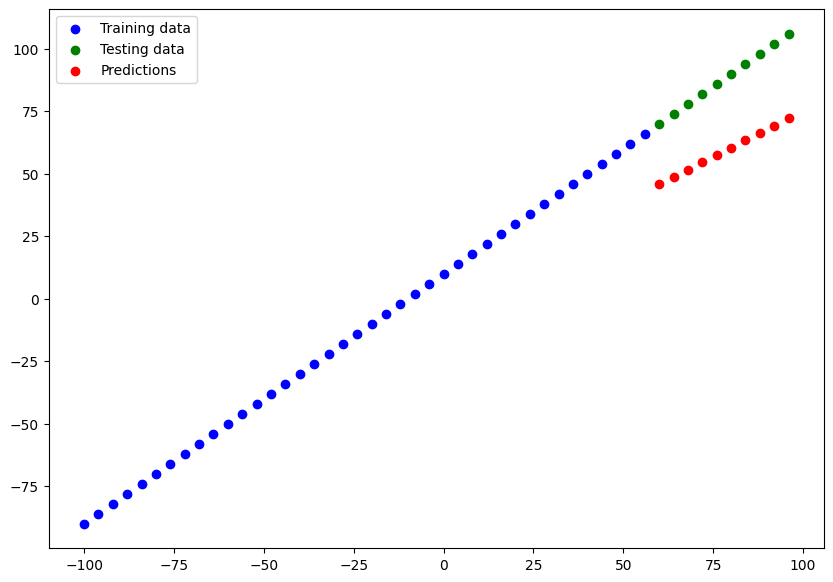

In [65]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [69]:

# Calculate model_2 metrics
mae_2 = mean_absolute_error(y_test, y_preds_2)
mse_2 = mean_squared_error(y_test, y_preds_2)

print(mae_2, mse_2)

29.040325164794922 852.6629028320312


# Build model_3

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [70]:

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


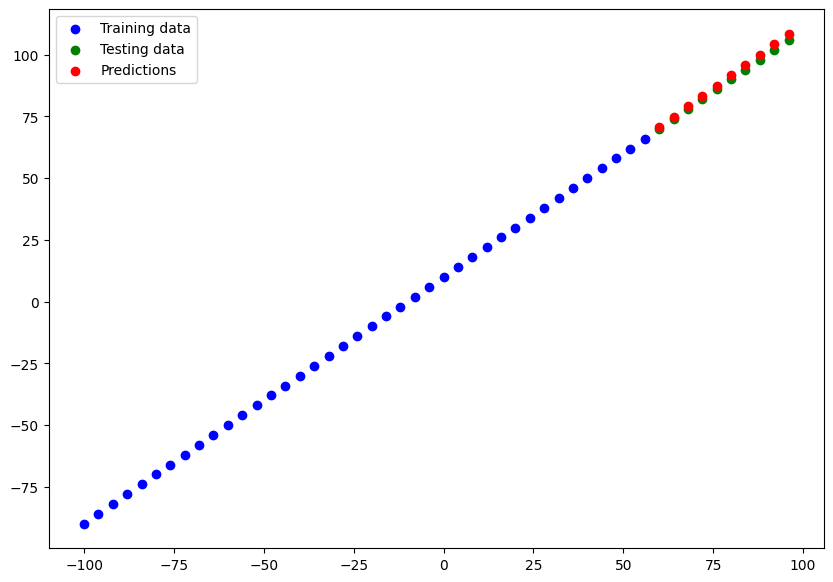

In [71]:

# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [72]:
# Calculate model_2 metrics
mae_3 = mean_absolute_error(y_test, y_preds_3)
mse_3 = mean_squared_error(y_test, y_preds_3)

print(mae_3, mse_3)

1.5706641674041748 2.8193676471710205


In [77]:
#Comparing results
#Now we've got results for 3 similar but slightly different results, let's compare them.


model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]
model_results
     

[['model_1', 19.17702293395996, 370.1734313964844],
 ['model_2', 29.040325164794922, 852.6629028320312],
 ['model_3', 1.5706641674041748, 1.5706641674041748]]

In [75]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,19.177023,370.173431
1,model_2,29.040325,852.662903
2,model_3,1.570664,1.570664
